# **Where does disatisfaction come from, <br> among Autralian education sector professionals ?**


### **In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.**<br>
We'll answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?



In [12]:
import numpy as np
import pandas as pd
dete_survey = pd.read_csv("/content/drive/MyDrive/Dataquest/Australian_Dete/dete_survey.csv")
tafe_survey = pd.read_csv("/content/drive/MyDrive/Dataquest/Australian_Dete/tafe_survey.csv")
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [14]:
pd.options.display.max_columns = 150 # == Not troncated
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
dete_null = dete_survey.isnull().sum()
print(dete_null)

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [48]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [17]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [18]:
tafe_null = tafe_survey.isnull().sum()
print(tafe_null)

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


### **As we can see, the two datasets contains some rows with a majority of null values.**

- Some of them are marked as "Not Stated"
- Some columns are unrelevant for our study, in both dataframe

### **We'll try to assign them to available datas when possible, or delete them if not.**

Let's read the dete_survey.csv again, but with the Not Stated values in as NaN :


In [20]:
dete_survey = pd.read_csv("/content/drive/MyDrive/Dataquest/Australian_Dete/dete_survey.csv", na_values = 'Not Stated')
dete_survey

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,SA,N,D,D,A,N,N,D,A,N,A,A,N,SA,SA,N,D,A,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,A,SA,D,D,D,A,A,N,A,N,A,A,N,A,N,N,A,A,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,A,A,A,A,A,D,N,A,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,A,D,D,A,SD,SD,SD,A,D,SD,SD,D,A,A,N,N,N,SD,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN


#### We'll now delete the rows in DETE survey for wich we don't have the necessary background to interpret the results :


In [21]:
#First check thoses values : 
print(dete_survey.iloc[0, 28:49])
print('\n')
print(dete_survey.columns)

Professional Development       A
Opportunities for promotion    A
Staff morale                   N
Workplace issue                N
Physical environment           N
Worklife balance               A
Stress and pressure support    A
Performance of supervisor      A
Peer support                   A
Initiative                     N
Skills                         N
Coach                          N
Career Aspirations             A
Feedback                       A
Further PD                     A
Communication                  N
My say                         A
Information                    A
Kept informed                  N
Wellness programs              N
Health & Safety                N
Name: 0, dtype: object


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       '

In [22]:
# Then delete the values : 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
# And check : 
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


#### And we also delete the missing rows in TAFE survey :


In [23]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
# And check : 
print(tafe_survey_updated.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

### **Let's rename columns in both dataframes**
##### For the DETE dataframe, we'll make this changes :

- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').



In [24]:
# Lowercase
dete_survey_updated.columns = dete_survey_updated.columns.str.lower()

# Whitespace
dete_survey_updated.columns = dete_survey_updated.columns.str.strip()

#Replace spaces with underscores
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_')

# And check the result
dete_survey_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### We give the same index to the columns that aggregates the same datas than DETE :

- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'



In [25]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check if chages are done
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


#### Let's check the unique values in the 'separationtype' column :

In [26]:
# In the TAFE dataframe
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [27]:
# In the DETE dataframe
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [28]:
# Select the 'Resignation' column in each types of dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

print(dete_resignations)
print('\n')
print('\n')
print(tafe_resignations)

      id separationtype cease_date  dete_start_date  role_start_date  \
3      4    Resignation    05/2012           2005.0           2006.0   
5      6    Resignation    05/2012           1994.0           1997.0   
8      9    Resignation    07/2012           2009.0           2009.0   
9     10    Resignation       2012           1997.0           2008.0   
11    12    Resignation       2012           2009.0           2009.0   
..   ...            ...        ...              ...              ...   
808  810    Resignation    12/2013           2010.0           2010.0   
815  817    Resignation    01/2014           2012.0           2012.0   
816  818    Resignation    01/2014           2012.0           2012.0   
819  821    Resignation    01/2014           2009.0           2009.0   
821  823    Resignation    12/2013              NaN              NaN   

             position classification                region  \
3             Teacher        Primary    Central Queensland   
5    Guidan

### **Let's study the dates of employement, to find if some values don't make sense :**

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.



In [29]:
# Check the unique dates in DETE dataframe
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64


#### Now we extract those years : 


In [30]:
# Extract and convert in float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the result in descending order
dete_resignations['cease_date'].value_counts().sort_index(ascending=False)



2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [31]:
# Check the unique dates in TAFE dataframe (in descending order)
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)


2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

#### **We can conclude that the DETE and TAFE dataframes don't include any abnormal values anymore**

### **We are now one step away from answering our main question :** 
**--> Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?**


##### Let's create a new column in DETE dataframe, wich report the length of employement time in years, for each entry : 

In [32]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Check the result
print(dete_resignations['institute_service'].value_counts().sort_index(ascending=False))

dete_resignations['institute_service'].describe()

49.0     1
42.0     1
41.0     1
39.0     3
38.0     1
36.0     2
35.0     1
34.0     1
33.0     1
32.0     3
31.0     1
30.0     2
29.0     1
28.0     2
27.0     1
26.0     2
25.0     2
24.0     4
23.0     4
22.0     6
21.0     3
20.0     7
19.0     3
18.0     5
17.0     6
16.0     5
15.0     7
14.0     6
13.0     8
12.0     6
11.0     4
10.0     6
9.0     14
8.0      8
7.0     13
6.0     17
5.0     23
4.0     16
3.0     20
2.0     14
1.0     22
0.0     20
Name: institute_service, dtype: int64


count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

#### We can see that : 
- Employement time of less than 10 years appears to be the more common type
- 1 of 4 contract ended in the 3 first years
- The global mean stays quite high (10.45) because of the remarquable length of the oldest contracts

In [33]:
#print(dete_resignations.loc['work_location'])
print(dete_resignations.loc[dete_resignations['work_location'] == True])


      id separationtype  cease_date  dete_start_date  role_start_date  \
23    24    Resignation      2012.0           1973.0           2012.0   
69    70    Resignation      2012.0           2006.0              NaN   
189  190    Resignation      2012.0           2006.0           2007.0   
250  251    Resignation      2013.0           2006.0           2006.0   
256  257    Resignation      2012.0           2005.0           2005.0   
284  285    Resignation      2012.0           2007.0           2008.0   
322  323    Resignation      2013.0           2007.0           2007.0   
340  341    Resignation      2013.0           2005.0           2012.0   
398  399    Resignation      2012.0           1993.0           2011.0   
408  409    Resignation      2012.0           2006.0           2006.0   
419  420    Resignation      2013.0           2012.0           2012.0   
575  576    Resignation      2013.0           2004.0           2005.0   
576  577    Resignation      2013.0           2004.

### Now we'll count the dissatisfied workers amongst TAFA and DETE dataframes.

We can study these datas by inspect this columns in TAFE : 

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction


And these datas in DETE : 

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload


##### --> Any 'True' answer to one of these questions will set the value in the newly created 'dissatisfied' column, as 'True'
##### --> If every values are set to 'False', the value in 'dissatisfied' will be 'False' as well
##### --> If every values are set to 'Nan', the value in 'dissatisfied' will be 'Nan' as well



In [34]:
# Let's check the TAFE dataframe values : 
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())                
                  

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


#### We'll now update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction', from the TAFE dataframe, so that each contains only True, False, or NaN values.

##### Let's define a function to populate the 'dissatisfied' column : 


In [35]:
def update_vals(value):
    if value == '-':
        return False
    elif pd.isnull(value):
        return np.nan
    else : 
        return True

# And apply it to TAFE dataframe selected columns
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

##### And populate the selected DETE dataframe columns with True, False, or NaN values, as well :  

In [36]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)



False    162
True     149
Name: dissatisfied, dtype: int64

#### **We will now add a column to each dataframe,  that will allow us to easily distinguish between the two :**

- A column named institute to dete_resignations_up, where each row contain the value DETE.
- A column named institute to dete_resignations_up, where each row contain the value TAFE.


In [37]:
# COMMENT
dete_resignations_up['institute'] = dete_resignations_up['institute'] = 'DETE'
print(dete_resignations_up['institute'])


3      DETE
5      DETE
8      DETE
9      DETE
11     DETE
       ... 
808    DETE
815    DETE
816    DETE
819    DETE
821    DETE
Name: institute, Length: 311, dtype: object


In [38]:
# COMMENT
tafe_resignations_up['institute'] = tafe_resignations_up['institute'] = 'TAFE'
print(tafe_resignations_up['institute'])


3      TAFE
4      TAFE
5      TAFE
6      TAFE
7      TAFE
       ... 
696    TAFE
697    TAFE
698    TAFE
699    TAFE
701    TAFE
Name: institute, Length: 340, dtype: object


#### Let's combine the two updated dataframes, and display the result : 

In [39]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

#### For cleaning purpose, we now want to drop the columns with too much null values ( = up to 500, wich is about 75% of the total values)

In [40]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
print(combined_updated)

               id separationtype  cease_date                 position  \
0    4.000000e+00    Resignation      2012.0                  Teacher   
1    6.000000e+00    Resignation      2012.0         Guidance Officer   
2    9.000000e+00    Resignation      2012.0                  Teacher   
3    1.000000e+01    Resignation      2012.0             Teacher Aide   
4    1.200000e+01    Resignation      2012.0                  Teacher   
..            ...            ...         ...                      ...   
646  6.350660e+17    Resignation      2013.0         Operational (OO)   
647  6.350668e+17    Resignation      2013.0  Teacher (including LVT)   
648  6.350677e+17    Resignation      2013.0                      NaN   
649  6.350704e+17    Resignation      2013.0  Teacher (including LVT)   
650  6.350730e+17    Resignation      2013.0      Administration (AO)   

       employment_status  gender     age institute_service dissatisfied  \
0    Permanent Full-time  Female   36-40        

#### But how exactly the unique values are distributed on this serie ? 

In [41]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [42]:
# Convert to string and extract the number of years
pattern_date = r'(\d+)'
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(pattern_date)

# Convert back to float type and save as 'combined_updated'
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check 
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64



##### To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [43]:



# A function that maps each year value to one of the career stages 
def categorized(val) : 
    if val < 3 : 
        return 'New'
    elif val > 2 and val < 7 : 
        return 'Experienced'
    elif val > 6 and val < 11 : 
        return 'Established'
    elif val > 10 :
        return 'Veteran'

# Apply to a 'service_cat' value and check the result 
service_cat = combined_updated['institute_service_up'].apply(categorized)
#print(service_cat)

# Create a new column named 'service_cat'
combined_updated['service_cat'] = service_cat

print(combined_updated['service_cat'].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


#### **As we previously guessed, the 'New' category of contract is the most populate of all 4 type of length.**


Use the Series.value_counts() method to confirm if the number of True and False in the dissatisfied column. Set the dropna parameter to False to also confirm the number of missing values.

In [44]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [45]:
# Replacing missing values with the more current value (= False)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

##### Let's calculate the percentage of dissatisfied employees in each category of contract length (from 'New' to 'Veteran') : 

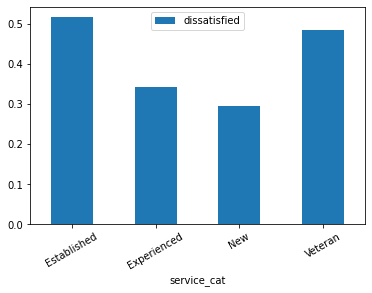

In [46]:
# With the DataFrame.pivot_table() method 
diss_perc = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Display the results with matplotlib

diss_perc.plot(kind='bar', rot=30, )


## **As a temporary conclusion to this short study, we can note that employees wit 7 or more years of contract (the Established and Veteran categories) are more likely to quit the job for dissatisfaction than the newer employees.** 